In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import warnings

In [9]:
pd.set_option('mode.chained_assignment', None)

In [2]:
info_df = pd.read_csv('../datasets/rank_1/track_info.csv')
charts_df = pd.read_csv('../datasets/rank_1/charts.csv')

In [3]:
merged_df = pd.merge(charts_df, info_df, left_on='Track ID', right_on='track_id', how='inner')
merged_df.head()

,Date,Song,Artist,Weeks in Charts,Track ID,track_id,track_name,artist_id,artist_name,Album ID,artist_genres,explicit,duration,key,mode,time_signature
0,1958-08-06,Poor Little Fool,Ricky Nelson,2,5ayybTSXNwcarDtxQKqvWX,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,73sSFVlM6pkweLXE8qw1OS,Ricky Nelson,08TlIPCh7esOAnqBvlmkEt,"['adult standards', 'doo-wop', 'rock-and-roll'...",False,2:33,C,Major,4
1,1958-08-13,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,3,006Ndmw2hHxvnLbJsBFnPx,006Ndmw2hHxvnLbJsBFnPx,Nel Blu Dipinto Di Blu (Volare),4llklDtTTyMYMY2LfFOkTI,Domenico Modugno,3RWfLO5X2CSxBI5oH84mra,"['classic italian pop', 'italian adult pop']",False,3:36,A♯/B♭,Major,4
2,1958-08-20,Little Star,The Elegants,4,6xupOaBWORbDmakCdQwMRG,6xupOaBWORbDmakCdQwMRG,Little Star,7bNoMfBqbaLJrfH3Vw1q6L,The Elegants,7mFC0w7g7lopYnuQeZH7rd,['doo-wop'],False,2:40,A,Major,4
3,1958-08-27,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,5,006Ndmw2hHxvnLbJsBFnPx,006Ndmw2hHxvnLbJsBFnPx,Nel Blu Dipinto Di Blu (Volare),4llklDtTTyMYMY2LfFOkTI,Domenico Modugno,3RWfLO5X2CSxBI5oH84mra,"['classic italian pop', 'italian adult pop']",False,3:36,A♯/B♭,Major,4
4,1958-09-03,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,6,006Ndmw2hHxvnLbJsBFnPx,006Ndmw2hHxvnLbJsBFnPx,Nel Blu Dipinto Di Blu (Volare),4llklDtTTyMYMY2LfFOkTI,Domenico Modugno,3RWfLO5X2CSxBI5oH84mra,"['classic italian pop', 'italian adult pop']",False,3:36,A♯/B♭,Major,4


In [128]:
plot_df = merged_df[['Date', 'explicit', 'mode', 'time_signature']]

plot_df['explicit'] = plot_df['explicit'].astype(bool)

plot_df['explicit'] = plot_df['explicit'].apply(lambda x: True if x not in [True, False] else x)
plot_df['explicit'] = plot_df['explicit'].apply(lambda x: 1 if x == True else 0)


plot_df['mode'] = plot_df['mode'].apply(lambda x: 'Major' if x not in ['Major', 'Minor'] else x)
plot_df['mode'] = plot_df['mode'].apply(lambda x: 0 if x == 'Major' else 1)

plot_df['time_signature'] = plot_df['time_signature'].replace({0: 4, 1: 4})
plot_df['time_signature'] = plot_df['time_signature'].apply(lambda x: 0 if x == 4 else 1)

plot_df['Date'] = pd.to_datetime(plot_df['Date'])

plot_df =  plot_df.rename(columns={
    'time_signature': '3/4 Time Signature',
    'mode': 'Minor Key',
    'explicit': 'Explicit'
})

plot_df.head()

,Date,Explicit,Minor Key,3/4 Time Signature
0,1958-08-06,0,0,0
1,1958-08-13,0,0,0
2,1958-08-20,0,0,0
3,1958-08-27,0,0,0
4,1958-09-03,0,0,0


In [138]:
plot_df.to_csv('../datasets/rank_1/binary_classifications.csv', index=False)

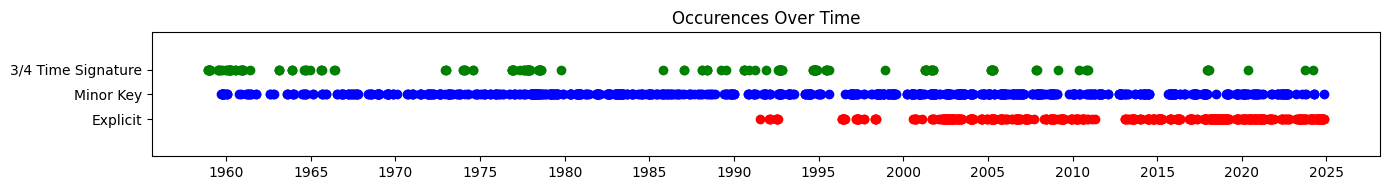

In [142]:
fig = plt.figure(figsize=(14, 2))

labels = plot_df.columns[1:].tolist()

explicit_occurrences = plot_df[plot_df['Explicit'] == 1]
plt.scatter(explicit_occurrences['Date'], [0.8] * len(explicit_occurrences), label=labels[0], color='red')

minor_occurrences = plot_df[plot_df['Minor Key'] == 1]
plt.scatter(minor_occurrences['Date'], [1.0] * len(minor_occurrences), label=labels[1], color='blue')

_34_occurrences = plot_df[plot_df['3/4 Time Signature'] == 1]
plt.scatter(_34_occurrences['Date'], [1.2] * len(_34_occurrences), label=labels[2], color='green')

plt.title('Occurences Over Time')

plt.xticks(rotation=0)
plt.yticks([0.8, 1, 1.2], labels)
plt.ylim(0.5, 1.5)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))

plt.tight_layout()
plt.show()